In [1]:
# loading required packages
import ctypes
import sys
import numpy as np
import os
import matplotlib.pyplot as plt

# PDF predictions

In [2]:
# compiling and loading c++ library
os.system("cd cpp_code; make DSS")
lib=ctypes.CDLL("cpp_code/DSS.so")

In [3]:
#initialising a new universe and its matter content
initialise_new_Universe = lib.initialise_new_Universe
# initialise_new_Universe          (double a_initial,  double a_final,  double Omega_m,  double Omega_b,  double Omega_r,  double Omega_L,  double sigma_8,      double n_s,    double h_100,       double w0,       double w1)
initialise_new_Universe.argtypes = [ ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double]
initialise_new_Universe.restype = None

clear_universes = lib.clear_universes
clear_universes.restype = None


In [4]:
add_projected_galaxy_sample = lib.add_projected_galaxy_sample
# add_projected_galaxy_sample          (int index_of_universe, const char *n_of_z_file,  double density_in_1_over_arcminSq,        double b1,        double b2,       double a0,       double a1,       double a2, int bias_model)
add_projected_galaxy_sample.argtypes = [         ctypes.c_int,         ctypes.c_char_p,                    ctypes.c_double,  ctypes.c_double,  ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double,   ctypes.c_int]
add_projected_galaxy_sample.restype = None

add_projected_galaxy_sample_with_IA = lib.add_projected_galaxy_sample_with_IA
# add_projected_galaxy_sample_with_IA          (int index_of_universe, const char *n_of_z_file, double density_in_Mpc_over_h_cubed,        double b1,        double b2,       double a0,       double a1,       double a2,     double A_IA, double alpha_IA, int bias_model)
add_projected_galaxy_sample_with_IA.argtypes = [         ctypes.c_int,         ctypes.c_char_p,                    ctypes.c_double,  ctypes.c_double,  ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double,   ctypes.c_int]
add_projected_galaxy_sample_with_IA.restype = None

add_projected_galaxy_sample_from_table = lib.add_projected_galaxy_sample_from_table
#add_projected_galaxy_sample_from_table(int index_of_universe, const char *n_of_z_file, double density_in_arcmin_squared, const char *bias_table)
add_projected_galaxy_sample_from_table.argtypes= [ctypes.c_int,         ctypes.c_char_p,               ctypes.c_double,    ctypes.c_char_p]
add_projected_galaxy_sample_from_table.restype = None

return_N_max_projected = lib.return_N_max_projected
# int return_N_max_projected      (int index_of_galaxy_sample, double R_in_Mpc_over_h, double var_NL_rescale)
return_N_max_projected.argtypes = [              ctypes.c_int,        ctypes.c_double,       ctypes.c_double]
return_N_max_projected.restype = ctypes.c_int

change_parameters_of_projected_galaxy_sample = lib.change_parameters_of_projected_galaxy_sample
# change_parameters_of_projected_galaxy_sample          (int index_of_galaxy_sample,        double z,  double density_in_1_over_arcminSq,        double b1,        double b2,       double a0,       double a1,       double a2, int bias_model)
change_parameters_of_projected_galaxy_sample.argtypes = [              ctypes.c_int, ctypes.c_double,                    ctypes.c_double,  ctypes.c_double,  ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double,   ctypes.c_int]
change_parameters_of_projected_galaxy_sample.restype = None

change_b2_to_minimise_negative_densities_projected = lib.change_b2_to_minimise_negative_densities_projected
# change_b2_to_minimise_negative_densities_projected          (int index_of_galaxy_sample, double R_in_Mpc_over_h, double var_NL_rescale)
change_b2_to_minimise_negative_densities_projected.argtypes = [              ctypes.c_int,        ctypes.c_double,       ctypes.c_double]
change_b2_to_minimise_negative_densities_projected.restype = ctypes.c_double


# N_delta has to be hardcoded, because is it needed for defining the python-c++ interface
return_Ndelta = lib.return_Ndelta
return_Ndelta.argtypes = []
return_Ndelta.restype = ctypes.c_int

return_N_max_projected = lib.return_N_max_projected
#return_N_max_projected(int index_of_galaxy_sample, double theta, double var_NL_rescale)
return_N_max_projected.argtypes = [ctypes.c_int, ctypes.c_double, ctypes.c_double]
return_N_max_projected.restype = ctypes.c_int


In [5]:

N_delta = return_Ndelta()
print('N_delta computed')


def p_Ng_kappa(theta_in_arcmin, var_kappa_noise,var_NL_rescale,index_of_lens_sample, index_of_source_sample):

    f_NL = 0.0

    N_max = return_N_max_projected(index_of_lens_sample, theta_in_arcmin, var_NL_rescale)

    return_joint_PDF_Ng_kappa_noisy = lib.return_joint_PDF_Ng_kappa_noisy
    #return_joint_PDF_Ng_kappa_noisy           (                                double* joint_PDF,                          double* N_values,                    double* kappa_values, double theta_in_arcmin,     double f_NL, double var_NL_rescale, double kappa_noise_variance, int index_of_lens_sample, int index_of_source_sample)
    return_joint_PDF_Ng_kappa_noisy.argtypes = [ctypes.POINTER(ctypes.c_double*(N_max+1)*N_delta), ctypes.POINTER(ctypes.c_double*(N_max+1)), ctypes.POINTER(ctypes.c_double*N_delta),        ctypes.c_double, ctypes.c_double,       ctypes.c_double,             ctypes.c_double,             ctypes.c_int,               ctypes.c_int]
    return_joint_PDF_Ng_kappa_noisy.restype = None
    
    
    N_values         = (ctypes.c_double*(N_max+1))()
    kappa_values     = (ctypes.c_double*N_delta)()
    PDF_values       = (ctypes.c_double*(N_max+1)*N_delta)()
    return_joint_PDF_Ng_kappa_noisy(ctypes.byref(PDF_values), ctypes.byref(N_values), ctypes.byref(kappa_values), theta_in_arcmin, f_NL, var_NL_rescale, var_kappa_noise, index_of_lens_sample, index_of_source_sample)
    return np.array(N_values), np.array(kappa_values), np.array(PDF_values)


N_delta computed


In [6]:
# Takahasi cosmology:
Om =  0.279
Ob = 0.046
h = 0.70
ns = 0.97
sig8 = 0.82

# linear Eulerian bias & Poissonian shot-noise:
b1 = 2.0 
b2 = 0.0
a0 = 1.0
a1 = 0.0
a2 = 0.0

sigma_eps = 0.26
density_sources = 6.0  # gal/arcmin^{-2}
density_lenses = 0.0838 #gal/arcmin^{-2}

In [7]:
def initialise_universe(Om, Ob, h, ns, sig8):
    #
    a_initial = 0.000025
    a_final = 1.0
    #
    initialise_new_Universe(a_initial, a_final, Om, Ob, 0.0, 1.0-Om, sig8, ns, h, -1, 0.0)
    print('Universe has been created successfully!')

In [8]:
def Joint_PDF(Om, Ob, h, ns, sig8, b1, b2, a0, a1, a2 ,theta, density_lenses, density_sources, sigma_eps):
    #
    initialise_universe(Om, Ob, h, ns, sig8)
    #
    f_NL = 0.0
    var_NL_rescale = 1.0
    #
    var_kappa_noise = sigma_eps**2/(density_sources*np.pi*theta**2)
    #
    #
    # Eulerian:
    bias_model = 0 
    #
    n_of_z_file_str = 'data/redshift_distributions/DESY1_redmagic.dat'
    n_of_z_lens = ctypes.c_char_p(n_of_z_file_str.encode('utf-8'))
    add_projected_galaxy_sample(0, n_of_z_lens, density_lenses, b1, b2, a0, a1, a2, bias_model)
    #
    n_of_z_file_str = 'data/redshift_distributions/source_galaxy_pofz.tab'          
    n_of_z_file = ctypes.c_char_p(n_of_z_file_str.encode('utf-8'))
    add_projected_galaxy_sample(0, n_of_z_file, density_sources, 1, 0, 1, 0, 0, bias_model)
    #
    index_of_lens_sample = 0
    index_of_source_sample = 1
    # N_values, kappa_values, PDF_values = p_Ng_kappa(theta_in_arcmin, var_kappa_noise, index_of_lens_sample, index_of_source_sample)
    N_values, kappa_values, PDF_values = p_Ng_kappa(theta, var_kappa_noise, var_NL_rescale,index_of_lens_sample, index_of_source_sample)
    #
    #
    PDF_values = PDF_values.reshape(PDF_values.shape[1], PDF_values.shape[0])
    #
    clear_universes()    
    #
    return N_values, kappa_values, PDF_values

In [9]:
theta = 20.0 #arcmin
N_values, kappa_values, PDF_values = Joint_PDF(Om, Ob, h, ns, sig8, b1, b2, a0, a1, a2 ,theta, density_lenses, density_sources, sigma_eps)
print('Done!')

Universe has been created successfully!
Done!


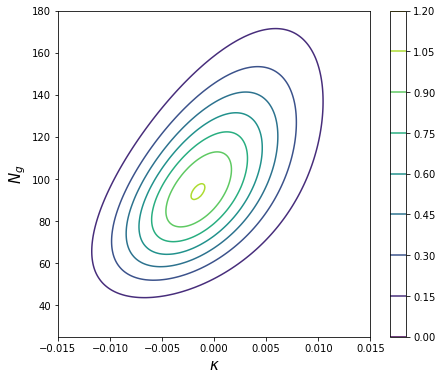

In [18]:
plt.figure(figsize=(7,6))

plt.contour(kappa_values,N_values,PDF_values)#, colors='red')
plt.colorbar()
plt.xlim(-0.015,0.015)
plt.ylim(25,180)
plt.xlabel(r'$\kappa$',size=15)
plt.ylabel(r'$N_g$',size=15)

plt.show()